In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
#from matplotlib import pyplot as plt

Import Data per scenario (Train:30, Dev: 5, Test: 5)

In [2]:
df_train = pd.read_json("C:/Users/hsmr0/IM/main/data/AMI-meeting-Parallel-Corpus-master/train.json")
df_train

,id,original_language,conversation
0,EN2001b,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
1,EN2005a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
2,EN2009d,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
3,ES2004c,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
4,ES2007d,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
5,ES2008b,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
6,ES2011b,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
7,ES2012c,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
8,ES2013a,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
9,ES2016c,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."


In [3]:
df_dev = pd.read_json("C:/Users/hsmr0/IM/main/data/AMI-meeting-Parallel-Corpus-master/dev.json")
df_dev

,id,original_language,conversation
0,IS1004a,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
1,ES2008a,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."
2,TS3004a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
3,EN2003a,en,"[{'no': 1, 'en_speaker': 'C', 'ja_sentence': '..."
4,IB4002,en,"[{'no': 1, 'en_speaker': 'D', 'ja_sentence': '..."


In [4]:
df_test = pd.read_json("C:/Users/hsmr0/IM/main/data/AMI-meeting-Parallel-Corpus-master/test.json")
df_test

,id,original_language,conversation
0,ES2003a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
1,IS1008c,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
2,IN1009,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
3,TS3006a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
4,IB4005,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."


Document-level data split

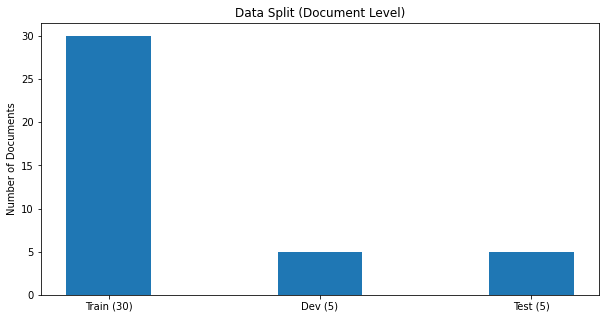

In [31]:
data_doc = {f'Train ({len(df_train.index)})':len(df_train.index), f'Dev ({len(df_dev.index)})':len(df_dev.index), f'Test ({len(df_test.index)})':len(df_test.index)}
x = list(data_doc.keys())
y = list(data_doc.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.ylabel("Number of Documents")
plt.title("Data Split (Document Level)")
plt.show()

 Inside the conversation column, there are several sentences both in en and ja, with eac sentence no. and speaker info ('en_speaker').  

In [9]:
df_train['conversation'].iloc[25]

[{'no': 1,
  'en_speaker': 'A',
  'ja_sentence': '改めまして、おはようございます。',
  'en_sentence': 'Good morning, again.'},
 {'no': 2,
  'en_speaker': 'C',
  'ja_sentence': '1つ質問があります。',
  'en_sentence': 'One question.'},
 {'no': 3, 'en_speaker': 'B', 'ja_sentence': 'はい。', 'en_sentence': 'Yeah.'},
 {'no': 4,
  'en_speaker': 'B',
  'ja_sentence': '番号を選びますか？',
  'en_sentence': 'Choose a number?'},
 {'no': 5, 'en_speaker': 'C', 'ja_sentence': '送信。', 'en_sentence': 'Send.'},
 {'no': 6, 'en_speaker': 'C', 'ja_sentence': '提出。', 'en_sentence': 'Submit.'},
 {'no': 7,
  'en_speaker': 'D',
  'ja_sentence': 'ええ、ええ、ええ、ええ。',
  'en_sentence': 'Yep yep yep yep.'},
 {'no': 8,
  'en_speaker': 'A',
  'ja_sentence': '用意はいいですか？',
  'en_sentence': 'All set?'},
 {'no': 9, 'en_speaker': 'C', 'ja_sentence': 'うむ。', 'en_sentence': 'Mm.'},
 {'no': 10, 'en_speaker': 'D', 'ja_sentence': 'ええ。', 'en_sentence': 'Mm-hmm.'},
 {'no': 11, 'en_speaker': 'C', 'ja_sentence': 'はい。', 'en_sentence': 'Yeah.'},
 {'no': 12,
  'en_speaker': 'A

Checking min/max/average length of the sentence

In [7]:
ja_sentence_list = []
en_sentence_list = []

for conversation in df_train['conversation']:
    #print (conversation)
    #convers_count += 1
    #sentence_count = 0
    #print ("convers_num: ", convers_count)
    for sentence in conversation:
        #print ("sentence_num: ", sentence_count)
        #print (sentence['ja_sentence'])
        ja_sentence_list.append(sentence['ja_sentence'])
        #print (sentence['en_sentence'])
        en_sentence_list.append(sentence['en_sentence'])
print ('ja_sentence')        
print (f'max length: {max(len(x) for x in ja_sentence_list)}\n (Index, sentence): {max(enumerate(ja_sentence_list), key=lambda x: len(x[1]))}')
print (f'min length: {min(len(x) for x in ja_sentence_list)}\n (Index, sentence): {min(enumerate(ja_sentence_list), key=lambda x: len(x[1]))}')
print (f'avrage length: {(sum(len(x) for x in ja_sentence_list)) / len(ja_sentence_list)}')


print ()
print ('en_sentence')
print (f'max length: {max(len(x) for x in en_sentence_list)}\n (Index, sentence): {max(enumerate(en_sentence_list), key=lambda x: len(x[1]))}')
print (f'min length: {min(len(x) for x in en_sentence_list)}\n (Index, sentence): {min(enumerate(en_sentence_list), key=lambda x: len(x[1]))}')
print (f'avrage length: {(sum(len(x) for x in en_sentence_list)) / len(en_sentence_list)}')


ja_sentence
max length: 308
 (Index, sentence): (15221, 'そうですか、でも、私は書面にしたものが必要なんです。その、例えば、あなたの機能設計や、あなたの技術的設計、そして、あー、このプロジェクトに何人必要としているのか、そしてどのくらいの期間を考えているか、いいですか、そして予算、つまり、あー、あなたの予算案、それから、市場にどう出すか、いいですか。なので、あなた、あなたはマーケティング チームと話し合わなければなりません。どのように売り出すか、マーケティング戦略計画をどうするか、いつ発表するか、いいですか。製品の発表までには、えー、分かるでしょうけど、競争相手がいる、いるはずです、いいですか。なので、私は、あなたの、あー、あー、計画を書面にしたものが必要なんです。')
min length: 1
 (Index, sentence): (10460, '-')
avrage length: 24.37725

en_sentence
max length: 662
 (Index, sentence): (15221, "Yeah, but uh I need something in the writing, so like uh what's your functional design, what's your technical design, and uh how many people you need for this project, and what's the time frame you're looking, okay, and what is the budget, maybe uh initial budget you're looking, okay, and uh how is going to the market, okay, so you've you've had to meet with the marketing team and how they're going to market and what are the marketing strategic plan, okay, when are you going to introduce, okay, and

In [35]:
# How many sentences are only with "-" or "." ?
print ('the number of "-": ', ja_sentence_list.count('-'))
print ('the number of ".": ', en_sentence_list.count('.'))
print ()
import collections
c_ja = collections.Counter(ja_sentence_list)
c_en = collections.Counter(en_sentence_list)
print('Duplicates in Japanese: ', c_ja.most_common()[:20])
print ()
print ('Duplicates in English: ',c_en.most_common()[:20])

the number of "-":  7
the number of ".":  7

Duplicates in Japanese:  [('ええ。', 1406), ('はい。', 896), ('そうですね。', 833), ('分かりました。', 529), ('ふむ。', 284), ('うーん。', 243), ('ふむふむ。', 127), ('うん。', 108), ('ああ。', 90), ('うむ。', 90), ('ええ、ええ。', 82), ('その通りです。', 82), ('うんうん。', 80), ('いいでしょう。', 79), ('なるほど。', 69), ('いいえ。', 54), ('んー。', 49), ('あー。', 43), ('いいですね。', 40), ('そうですか。', 40)]

Duplicates in English:  [('Yeah.', 1929), ('Mm-hmm.', 917), ('Okay.', 911), ('Mm.', 452), ('Right.', 155), ('Hmm.', 148), ('Yes.', 137), ('No.', 129), ('Yep.', 116), ('Yeah, yeah.', 98), ('Oh.', 80), ('Uh-huh.', 61), ('Um.', 59), ("'Kay.", 55), ('Alright.', 52), ('Uh.', 51), ('Yeah?', 31), ('Yeah, okay.', 29), ('Oh yeah.', 28), ('Thank you.', 26)]


Missing Value Check

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 30 non-null     object
 1   original_language  30 non-null     object
 2   conversation       30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [24]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5 non-null      object
 1   original_language  5 non-null      object
 2   conversation       5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5 non-null      object
 1   original_language  5 non-null      object
 2   conversation       5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


Check unique values or duplicates etc
- Original language is always English 

In [26]:
df_train.describe()

,id,original_language,conversation
count,30,30,30
unique,30,1,30
top,EN2001b,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
freq,1,30,1


In [27]:
df_dev.describe()

,id,original_language,conversation
count,5,5,5
unique,5,1,5
top,IS1004a,en,"[{'no': 1, 'en_speaker': 'A', 'ja_sentence': '..."
freq,1,5,1


In [28]:
df_test.describe()

,id,original_language,conversation
count,5,5,5
unique,5,1,5
top,ES2003a,en,"[{'no': 1, 'en_speaker': 'B', 'ja_sentence': '..."
freq,1,5,1


Count Sentences 

In [29]:
# Count all sentences in entire dataset

tag_lists = ['phone call', 'meeting', 'face-to-face conversation', 'general chatting', 'presentation', 'training']

def count_sents(data):
    
    all_sents = 0
    
    for i in range(len(data)):
        sents_in_scenario = len(data['conversation'].iloc[i])
        all_sents += sents_in_scenario
             
                
    return all_sents 

print ("Sentence-level Data split")
print (f'Train: {count_sents(df_train)}\nDev  : {count_sents(df_dev)}\nTest : {count_sents(df_test)}')

Sentence-level Data split
Train: 20000
Dev  : 2000
Test : 2000


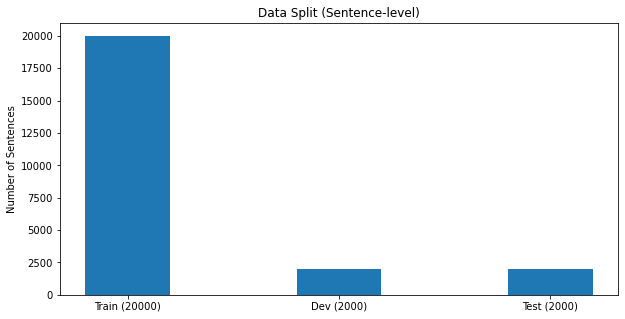

In [30]:
data_sent = {f'Train ({count_sents(df_train)})':count_sents(df_train), f'Dev ({count_sents(df_dev)})': count_sents(df_dev), f'Test ({count_sents(df_test)})':count_sents(df_test)}
x = list(data_sent.keys())
y = list(data_sent.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,width = 0.4)
 
plt.ylabel("Number of Sentences")
plt.title("Data Split (Sentence-level)")
plt.show()